# Linear Regression

Linear regression is a supervised learning algorithm that is applied to real valued target functions in order to predict a range of possible outputs for a given input (meaning it is NOT a classification). 

#### Assumptions of Linear Regression

* assume the targets are close to some linear combination of the features of the input data
* unlike other machine learning algorithms, linear regression has a closed-form solution (equation solution)

With the assumptions of a closed-form solution, we can write the following matrix to represent linear regression:

$$
\begin{bmatrix}
x_{1} & 1\\
x_{2} & 1\\
x_{3} & 1\\
\vdots & \vdots\\
x_{n} & 1
\end{bmatrix}
\begin{bmatrix}
w_1\\w_2
\end{bmatrix}
=\begin{bmatrix}
y_1\\y_2\\y_3\\ \vdots\\y_n
\end{bmatrix}
$$

The above matrix notation can also be represented by the following:

$$Xw = y$$

Unfortunately, the X part of our matrix is more than likely not invertible, therefore, the best we can do is to solve for an approximation:

$$X\hat{w}\approx y$$

In order to find a solvable state for the above approxmation, we can apply the following using linear algebra:

$$X^{T}X\hat{w}\approx X^{T}y \implies \hat{w} = (X^{T}X)^{-1}X^{T}y$$

We can now apply the above to a specific point, say $x^*$, to a linear regression system and reach at the following, known as our prediction:

$$y \approx \hat{w_1}x^* + \hat{w_2} $$

For this notebook we will need the following packages:
* Plots [documentation](http://docs.juliaplots.org/latest/)
* CSV [documentation](https://juliadata.github.io/CSV.jl/stable/)



In [34]:
using CSV
using Plots
using Random
theme(:dark)

# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55];

# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117];



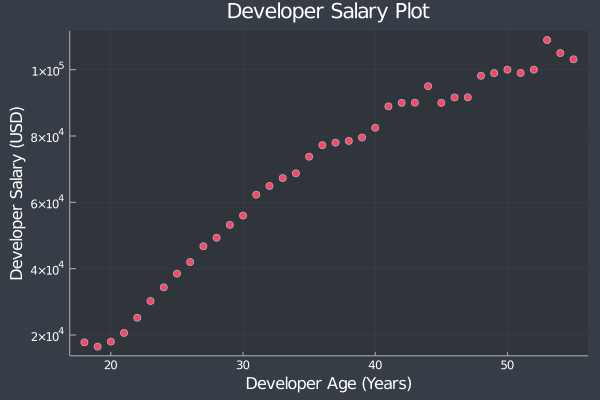

In [17]:
data = [x for x in zip(ages_x, dev_y)]

scatter([p for p in data], 
    xaxis = "Developer Age (Years)", 
    yaxis = "Developer Salary (USD)",
    title = "Developer Salary Plot",
    legend = false)

We will proceed to split the data into a training set and a testing set. The following code cells will assign random subset from the data as training data and the rest into testing data.

In [35]:
# Randomly select data points from the full data set to make a training data set
train_x = randsubseq(ages_x, .5)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = [x for x in zip(train_x, train_y)]

# Test data 
test_data = [x for x in data if x ∉ train_data];

We will create the matrix X and then solve the equation of $\hat{w}$ as outlined earlier:

$$\hat{w} = (X^{T}X)^{-1}X^{T}y$$

In [36]:
# first make the matrix X
X = ones(length(train_x), 2)
X[:, 1] = train_x

# next solve for ŵ
ŵ = (X'*X)\(X'*train_y)

# Note: Ax = b, then x = A\b solves the system

2-element Array{Float64,1}:
   2701.670124481328
 -29639.617565698485

We can now plot the regression line using the training data that was separated from the testing data from our earlier dataset as well as applying the same process to the testing data.

In [30]:
# define the regression line, i.e., the prediction function
prediction(x) = ŵ[1]*x + ŵ[2];

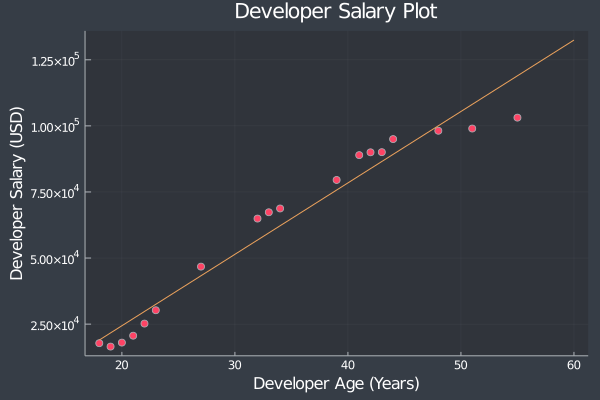

In [48]:
scatter([p for p in train_data], 
    xaxis = "Developer Age (Years)", 
    yaxis = "Developer Salary (USD)",
    title = "Developer Salary Plot",
    legend = false)

plot!([(x, prediction(x)) for x = 18:60])

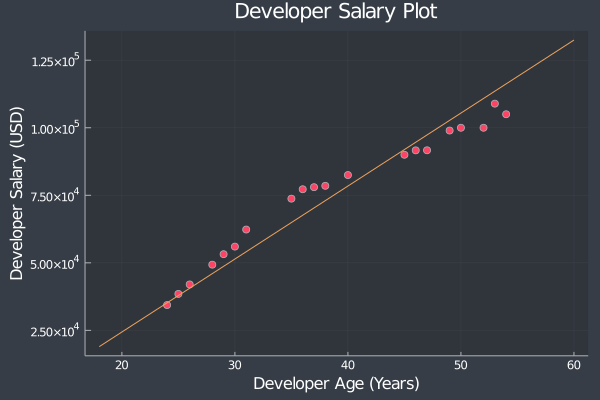

In [37]:
scatter([p for p in test_data], 
    xaxis = "Developer Age (Years)", 
    yaxis = "Developer Salary (USD)",
    title = "Developer Salary Plot",
    legend = false)

plot!([(x, prediction(x)) for x = 18:60])

After plotting the regression line for both the training and testing data, we can then apply a range of intervals to more appropriately include more data points from our data. This can give us a proper estimation of individual points' range.

In [41]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

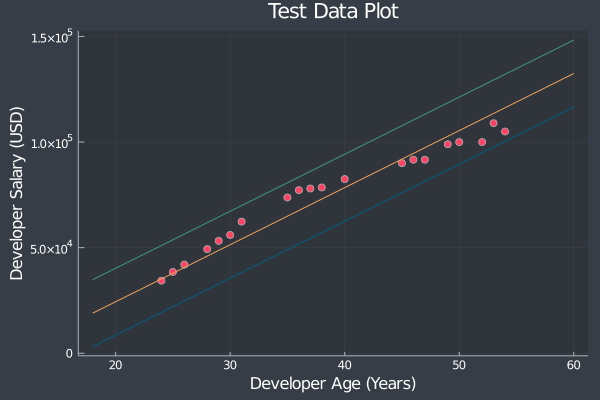

In [47]:
scatter(test_data,
    label = false,
    legend = false,
    xaxis = "Developer Age (Years)", 
    yaxis = "Developer Salary (USD)",
    title = "Test Data Plot")

plot!([(x , prediction(x)) for x = 18:60],
        label = "Regression Line")

plot!([(x , prediction(x) + maximum(error_array)) for x = 18:60],
        label = "Regression Line + error")

plot!([(x , prediction(x) - maximum(error_array)) for x = 18:60],
        label = "Regression Line - error")

In [44]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [45]:
test_data

20-element Array{Tuple{Int64,Int64},1}:
 (24, 34368) 
 (25, 38496) 
 (26, 42000) 
 (28, 49320) 
 (29, 53200) 
 (30, 56000) 
 (31, 62316) 
 (35, 73752) 
 (36, 77232) 
 (37, 78000) 
 (38, 78508) 
 (40, 82488) 
 (45, 90000) 
 (46, 91633) 
 (47, 91660) 
 (49, 98964) 
 (50, 100000)
 (52, 100000)
 (53, 108923)
 (54, 105000)

In [46]:
prediction_interval(40)

(62591.94813278009, 94262.42669432919)